# Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import os

In [2]:
path_file = 'data_LUCAS_spectra_x5.csv'
data_file = pd.read_csv(path_file)
data_file

,400,400.5,401,401.5,402,402.5,403,403.5,404,404.5,...,2498,2498.5,2499,2499.5,pH(H2O),OC,CaCO3,P,N,K
0,0.901924,0.907745,0.913509,0.919191,0.924762,0.930197,0.935479,0.940585,0.945503,0.950222,...,0.680936,0.680897,0.680853,0.680794,5.37,36.3,0,20.4,4.5,143.3
1,0.898363,0.904257,0.910094,0.915846,0.921486,0.926987,0.932330,0.937492,0.942457,0.947216,...,0.677963,0.677951,0.677934,0.677908,5.37,36.3,0,20.4,4.5,143.3
2,0.870422,0.876326,0.882174,0.887940,0.893597,0.899119,0.904488,0.909685,0.914694,0.919505,...,0.604319,0.604284,0.604248,0.604204,4.83,42.6,0,61.6,5.7,163.3
3,0.869277,0.875201,0.881073,0.886863,0.892548,0.898098,0.903495,0.908716,0.913746,0.918572,...,0.602675,0.602634,0.602588,0.602525,4.83,42.6,0,61.6,5.7,163.3
4,0.937757,0.944273,0.950737,0.957122,0.963402,0.969554,0.975558,0.981393,0.987043,0.992500,...,0.660369,0.660294,0.660218,0.660117,4.20,37.4,0,23.8,3.4,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43555,0.733104,0.740422,0.747762,0.755042,0.762232,0.769307,0.776239,0.783009,0.789593,0.795973,...,0.464860,0.464872,0.464881,0.464892,4.89,68.9,0,58.5,7.0,358.5
43556,0.802733,0.809121,0.815533,0.821897,0.828185,0.834378,0.840453,0.846387,0.852167,0.857771,...,0.540142,0.540102,0.540062,0.540007,4.65,97.9,0,43.5,8.6,241.6
43557,0.805018,0.811348,0.817702,0.824013,0.830256,0.836410,0.842448,0.848355,0.854109,0.859687,...,0.542687,0.542646,0.542599,0.542528,4.65,97.9,0,43.5,8.6,241.6
43558,0.843178,0.850101,0.857051,0.863953,0.870779,0.877509,0.884124,0.890602,0.896926,0.903077,...,0.515326,0.515362,0.515397,0.515446,4.13,134.4,0,30.5,11.3,173.8


In [3]:
zero_counts = (data_file['CaCO3'] == 0).sum()

print(f"Количество нулей в колонке 'CaCO3': {zero_counts}")

Количество нулей в колонке 'CaCO3': 21615


In [4]:
data_file = data_file.drop(data_file[data_file['CaCO3'] == 0].index)

In [5]:
zero_counts = (data_file['CaCO3'] == 0).sum()

print(f"Количество нулей в колонке 'CaCO3': {zero_counts}")

Количество нулей в колонке 'CaCO3': 0


In [6]:
data_file = data_file.reset_index(drop=True)
data_file

,400,400.5,401,401.5,402,402.5,403,403.5,404,404.5,...,2498,2498.5,2499,2499.5,pH(H2O),OC,CaCO3,P,N,K
0,0.922945,0.929902,0.936801,0.943618,0.950324,0.956894,0.963304,0.969532,0.975561,0.981377,...,0.618258,0.618300,0.618338,0.618384,7.16,77.2,89,28.8,6.9,235.0
1,0.921644,0.928622,0.935543,0.942376,0.949092,0.955661,0.962067,0.968286,0.974303,0.980105,...,0.616462,0.616498,0.616531,0.616570,7.16,77.2,89,28.8,6.9,235.0
2,0.829111,0.836485,0.843792,0.850997,0.858069,0.864974,0.871692,0.878201,0.884482,0.890525,...,0.542000,0.541980,0.541956,0.541922,6.87,34.2,7,19.2,4.2,42.6
3,0.826019,0.833386,0.840690,0.847895,0.854971,0.861889,0.868626,0.875156,0.881461,0.887530,...,0.538992,0.538988,0.538985,0.538983,6.87,34.2,7,19.2,4.2,42.6
4,0.803155,0.809623,0.816029,0.822336,0.828521,0.834552,0.840409,0.846071,0.851522,0.856753,...,0.522138,0.522115,0.522088,0.522050,7.16,35.1,44,22.6,3.6,17.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21940,0.834725,0.842162,0.849626,0.857029,0.864343,0.871544,0.878605,0.885508,0.892236,0.898770,...,0.490976,0.490988,0.490995,0.491000,5.83,78.0,1,73.0,7.5,350.4
21941,0.802320,0.810345,0.818397,0.826395,0.834305,0.842100,0.849757,0.857254,0.864566,0.871673,...,0.535166,0.535257,0.535343,0.535460,7.52,19.8,47,20.2,2.4,316.2
21942,0.802025,0.810102,0.818207,0.826259,0.834223,0.842071,0.849781,0.857324,0.864682,0.871835,...,0.536024,0.536117,0.536205,0.536324,7.52,19.8,47,20.2,2.4,316.2
21943,0.789451,0.796885,0.804342,0.811738,0.819043,0.826234,0.833289,0.840188,0.846912,0.853445,...,0.555969,0.556065,0.556160,0.556290,6.48,25.8,1,40.7,2.9,304.1


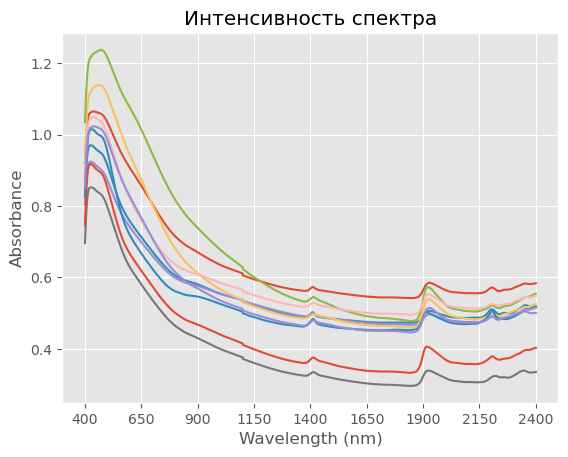

In [15]:
with plt.style.context(('ggplot')):
    data_file.loc[:18].iloc[::2,:4001].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absorbance')
    plt.title('Интенсивность спектра')
    plt.show()

In [11]:
X = data_file.drop(columns=['pH(H2O)','P','N','K','OC','CaCO3'], axis=1).values
wl= data_file.drop(columns=['pH(H2O)','P','N','K','OC','CaCO3'], axis=1).columns.values
print(wl.shape)
print(X.shape)

(4200,)
(21945, 4200)


сглаживающий фильтр Савицкого-Голея + производная 1 порядка

In [12]:
X1 = savgol_filter(X, 11, polyorder = 2,deriv=1)

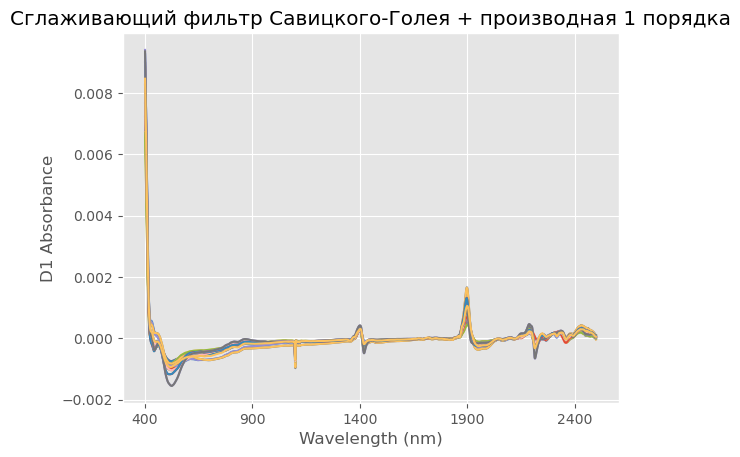

In [13]:
df = pd.DataFrame(X1, columns=wl)
with plt.style.context(('ggplot')):
    df.loc[:18].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D1 Absorbance')
    plt.title('Cглаживающий фильтр Савицкого-Голея + производная 1 порядка')
    plt.show()

сглаживающий фильтр Савицкого-Голея + производная 2 порядка

In [12]:
X2 = savgol_filter(X, 11, polyorder = 2,deriv=2)

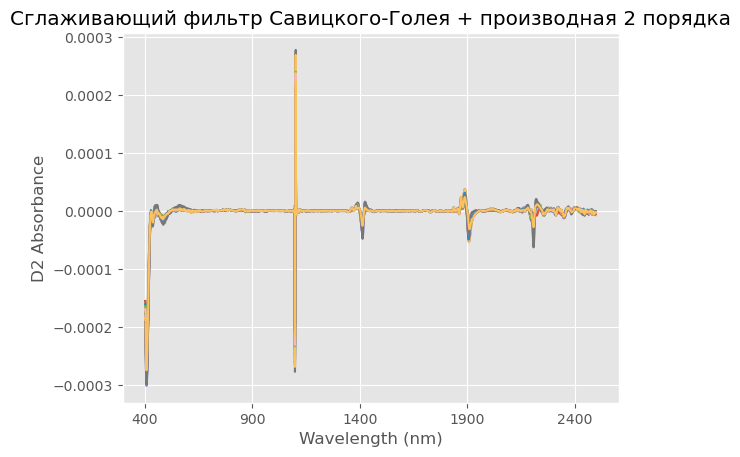

In [14]:
df = pd.DataFrame(X2, columns=wl)
with plt.style.context(('ggplot')):
    df.loc[:18].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.title('Cглаживающий фильтр Савицкого-Голея + производная 2 порядка')
    plt.show()

*Дискретное* вейвлет-преобразование (DWT)

In [20]:
import pywt

In [21]:
X_dwt = pywt.dwt(X, 'db1')

**X_dwt[0]:** Массив коэффициентов аппроксимации (средних значений).

**X_dwt[1]:** Массив коэффициентов детализации (высоких частот).

In [14]:
print(X_dwt[0].shape)

(21945, 2100)


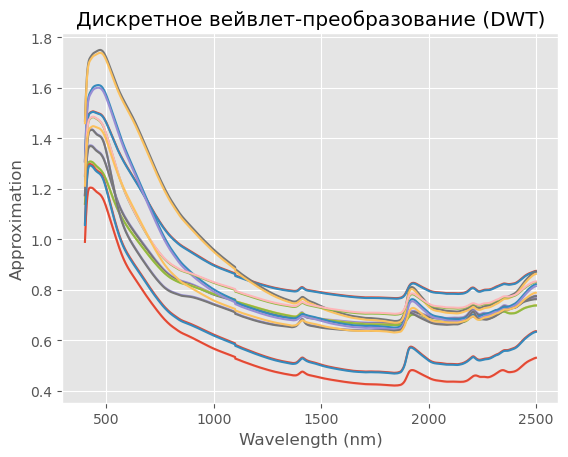

In [15]:
wl = np.arange(400,2500,1)
df = pd.DataFrame(X_dwt[0], columns=wl)
with plt.style.context(('ggplot')):
    df.loc[:18].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Approximation')
    plt.title('Дискретное вейвлет-преобразование (DWT)')
    plt.show()

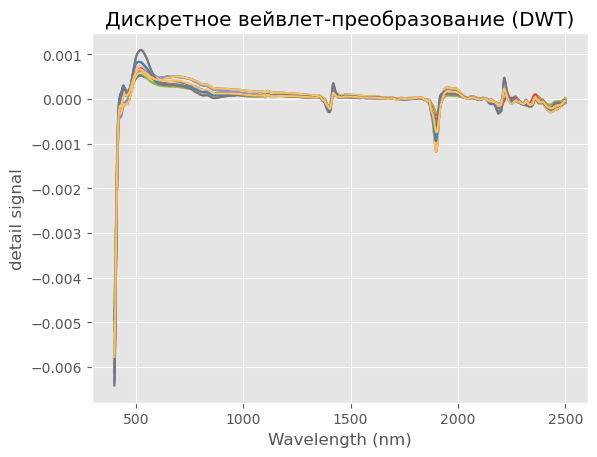

In [16]:
df = pd.DataFrame(X_dwt[1], columns=wl)
with plt.style.context(('ggplot')):
    df.loc[:18].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('detail signal')
    plt.title('Дискретное вейвлет-преобразование (DWT)')
    plt.show()

In [27]:
wl= data_file.drop(columns=['pH(H2O)','P','N','K','OC','CaCO3'], axis=1).columns.values
df = pd.DataFrame(X1, columns=wl)
# Убрать каждое второе значение (каждый второй столбец)
reduced_df = df.iloc[:, ::2]
# Вывести размеры массивов до и после
print("Размер исходного массива:", df.shape)
print("Размер уменьшенного массива:", reduced_df.shape)

Размер исходного массива: (21945, 4200)
Размер уменьшенного массива: (21945, 2100)


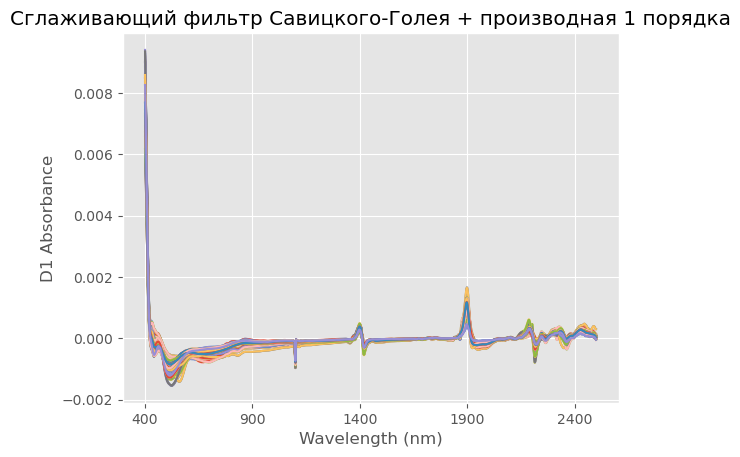

In [18]:
with plt.style.context(('ggplot')):
    reduced_df.loc[:100].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D1 Absorbance')
    plt.title('Cглаживающий фильтр Савицкого-Голея + производная 1 порядка')
    plt.show()

In [28]:
X1=reduced_df.values

In [15]:
wl_X2= data_file.drop(columns=['pH(H2O)','P','N','K','OC','CaCO3'], axis=1).columns.values
df_X2 = pd.DataFrame(X2, columns=wl)
# Убрать каждое второе значение (каждый второй столбец)
reduced_df_X2 = df_X2.iloc[:, ::2]
# Вывести размеры массивов до и после
print("Размер исходного массива:", df_X2.shape)
print("Размер уменьшенного массива:", reduced_df_X2.shape)

Размер исходного массива: (21945, 4200)
Размер уменьшенного массива: (21945, 2100)


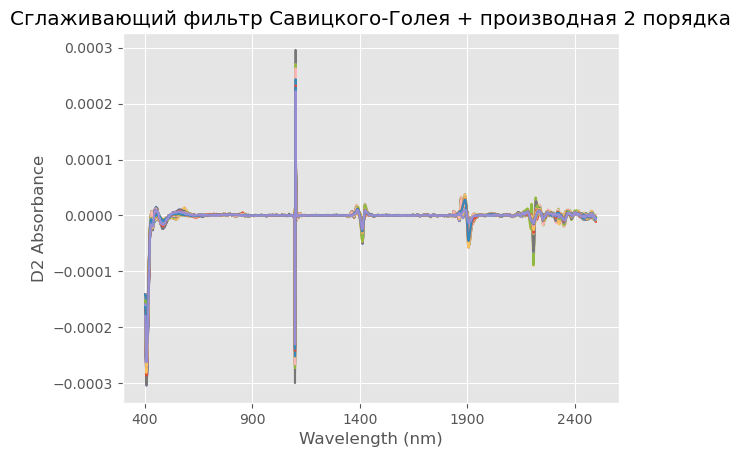

In [17]:
with plt.style.context(('ggplot')):
    reduced_df_X2.loc[:100].T.plot(legend=None)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.title('Cглаживающий фильтр Савицкого-Голея + производная 2 порядка')
    plt.show()

In [18]:
X2=reduced_df_X2.values

Объединение данных

In [13]:
X_combined = np.concatenate((X1, X_dwt[0], X_dwt[1]), axis=1)

Нормализация данных

In [19]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X_combined)

In [23]:
scaler_X = MinMaxScaler()
scaler_X1 = MinMaxScaler()
scaler_X2 = MinMaxScaler()
scaler_X_dwt0 = MinMaxScaler()
scaler_X_dwt1 = MinMaxScaler()

In [29]:
X_scaled = scaler_X.fit_transform(X)
X1_scaled = scaler_X1.fit_transform(X1)
X2_scaled = scaler_X2.fit_transform(X2)
X_dwt0_scaled = scaler_X_dwt0.fit_transform(X_dwt[0])
X_dwt1_scaled = scaler_X_dwt1.fit_transform(X_dwt[1])

In [30]:
X_scaled.shape, X1_scaled.shape, X2_scaled.shape, X_dwt0_scaled.shape, X_dwt1_scaled.shape

((21945, 4200), (21945, 2100), (21945, 2100), (21945, 2100), (21945, 2100))

In [32]:
os.makedirs('scaled_data_x5/v2', exist_ok=True)

np.save('scaled_data_x5/v2/X_scaled.npy', X_scaled)
np.save('scaled_data_x5/v2/X1_scaled.npy', X1_scaled)
np.save('scaled_data_x5/v2/X2_scaled.npy', X2_scaled)
np.save('scaled_data_x5/v2/X_dwt0_scaled.npy', X_dwt0_scaled)
np.save('scaled_data_x5/v2/X_dwt1_scaled.npy', X_dwt1_scaled)

Подготовка целевых значений

In [26]:
from sklearn.preprocessing import StandardScaler
y = data_file[['pH(H2O)','P','N','K','OC','CaCO3']]

#target_scaler = StandardScaler()
#y_scaled = target_scaler.fit_transform(y)
#print(y)
#print(y_scaled)
y

,pH(H2O),P,N,K,OC,CaCO3
0,7.16,28.8,6.9,235.0,77.2,89
1,7.16,28.8,6.9,235.0,77.2,89
2,6.87,19.2,4.2,42.6,34.2,7
3,6.87,19.2,4.2,42.6,34.2,7
4,7.16,22.6,3.6,17.9,35.1,44
...,...,...,...,...,...,...
21940,5.83,73.0,7.5,350.4,78.0,1
21941,7.52,20.2,2.4,316.2,19.8,47
21942,7.52,20.2,2.4,316.2,19.8,47
21943,6.48,40.7,2.9,304.1,25.8,1


In [27]:
y.to_csv (r'scaled_data_x5/y_data.csv', index= False )

Сохранение данных из numpy

In [16]:
#np.save('X_combined.npy', X_combined)
np.save('y_scaled_P.npy', y_scaled)

Разделение данных

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)